In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\Untitled Folder\\Census.csv")

In [50]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [51]:
df.shape

(32560, 15)

In [52]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# 75.91% persons have less than 50k salary. 24.08 % persons have more than 50k salary

In [53]:
24719/32560*100-100

-24.08169533169533

# Their is no null vaule in the data 

In [54]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Distribution of data

In [55]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

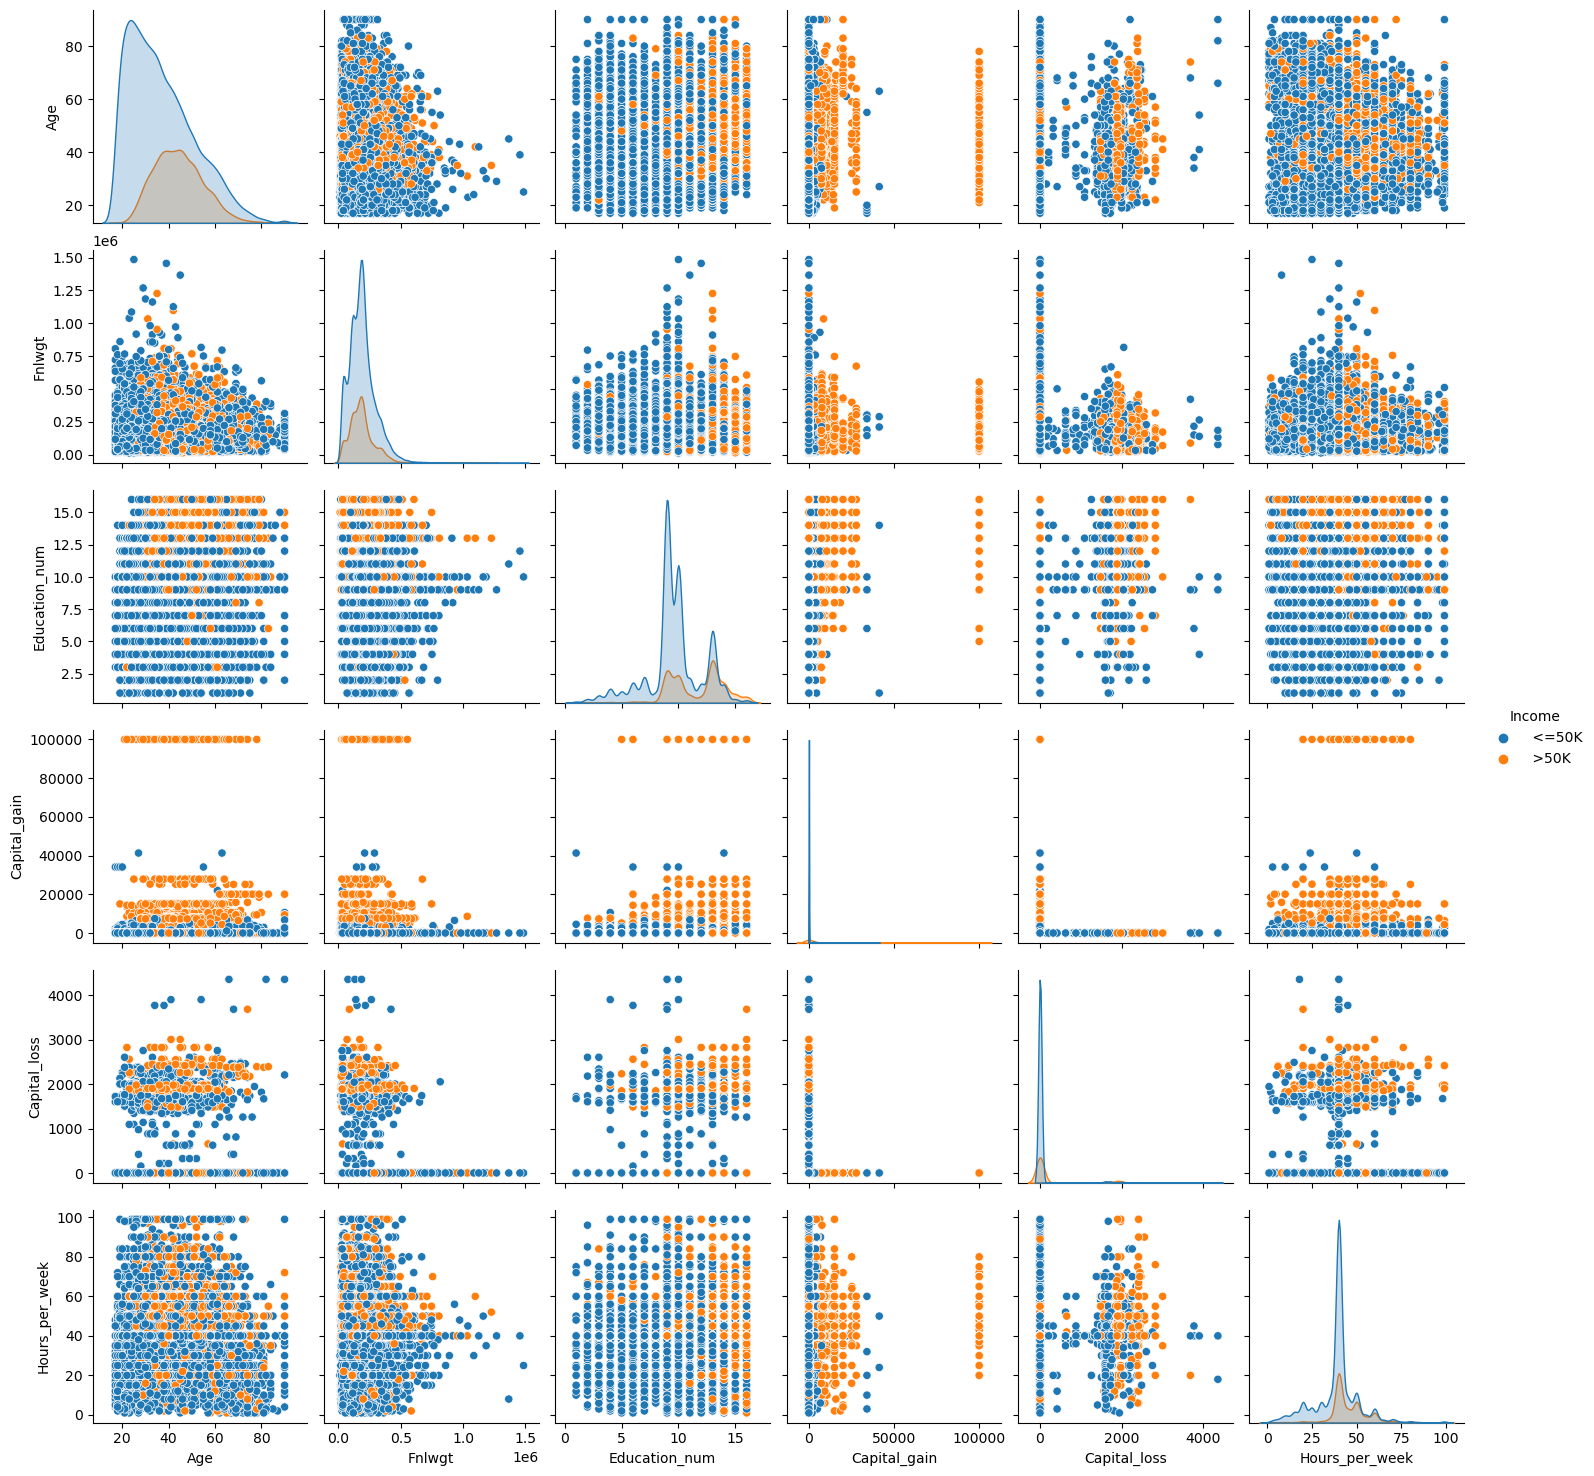

In [12]:
numeric_columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
sns.pairplot(df[numeric_columns + ['Income']], hue='Income', diag_kind='kde')
plt.show()

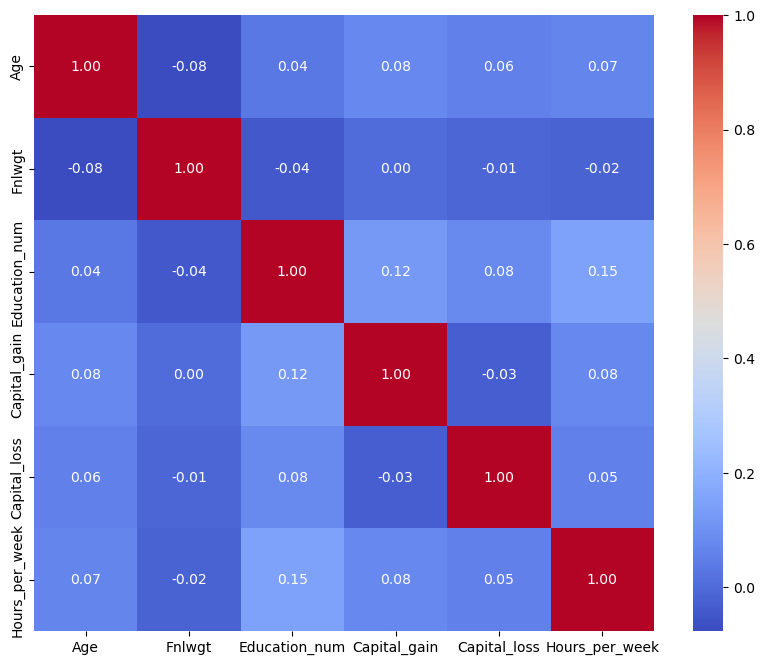

In [13]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Data consists of so many outlier. So by triming and capping the oulier may reduce their impact on statistical analyses or machine learning models.

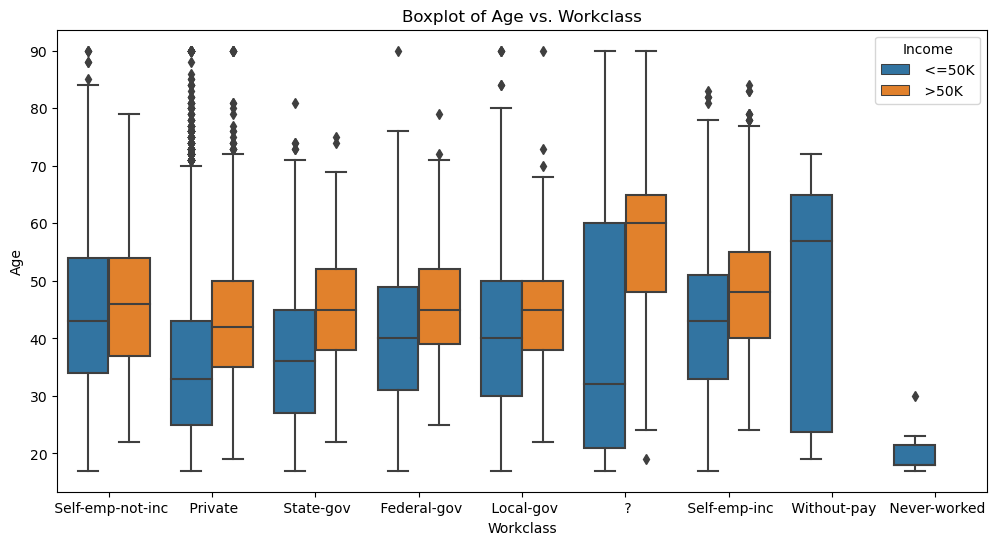

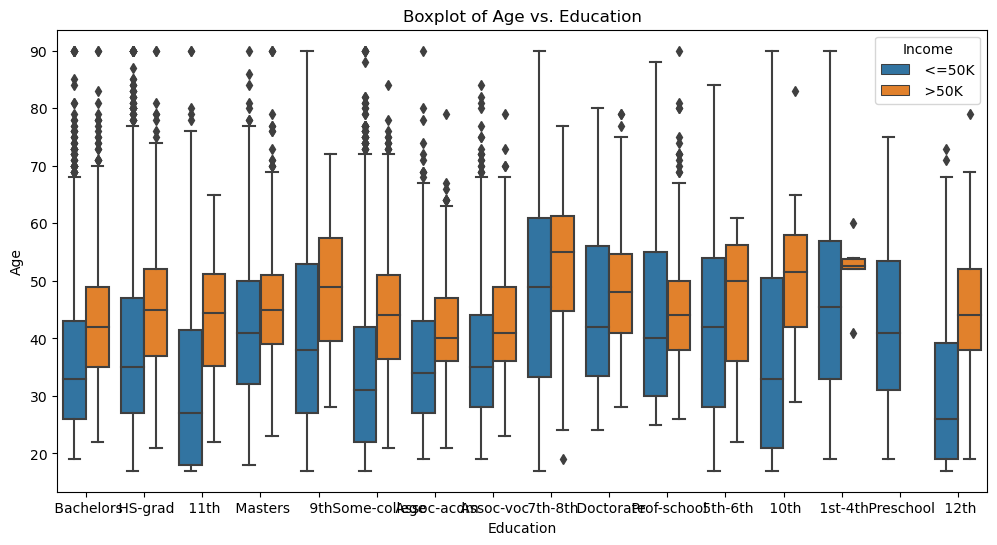

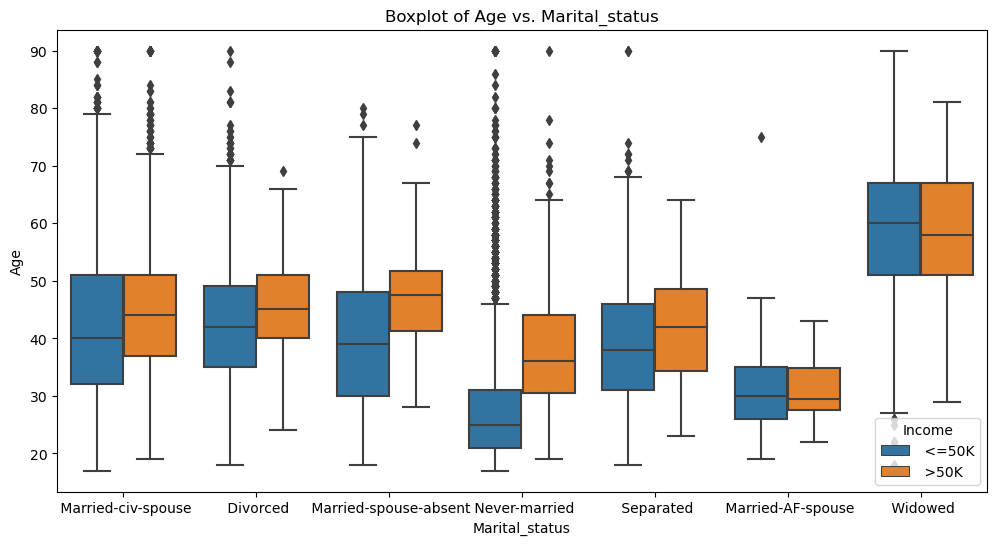

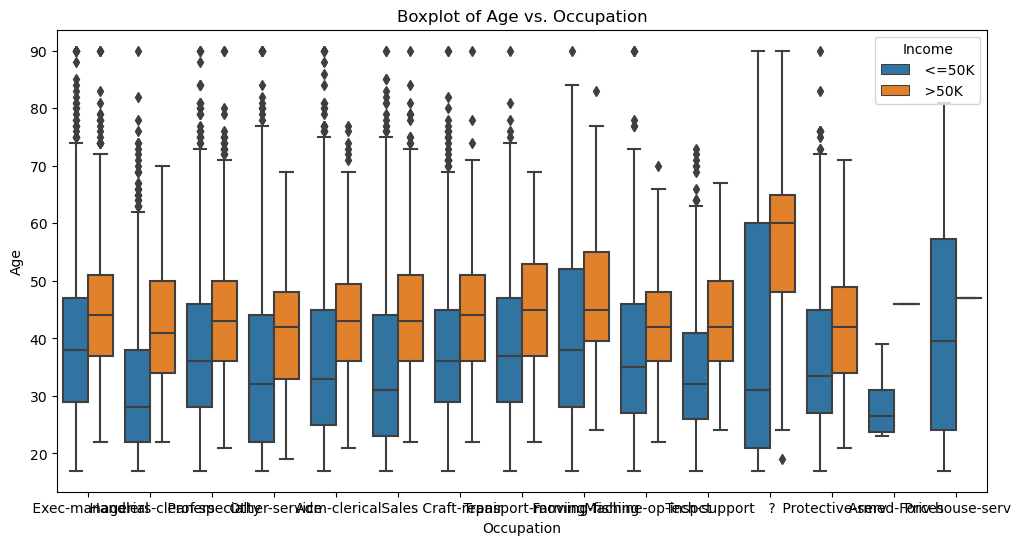

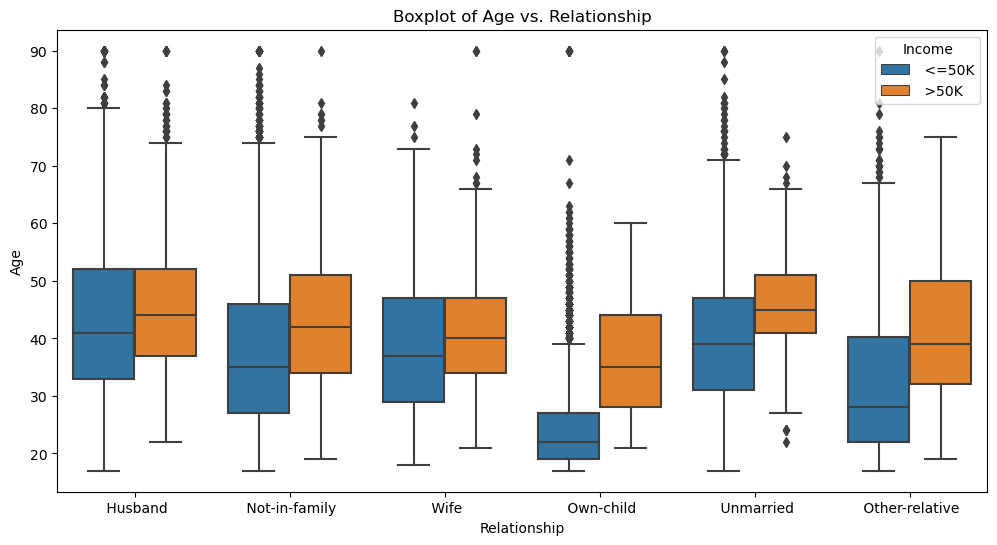

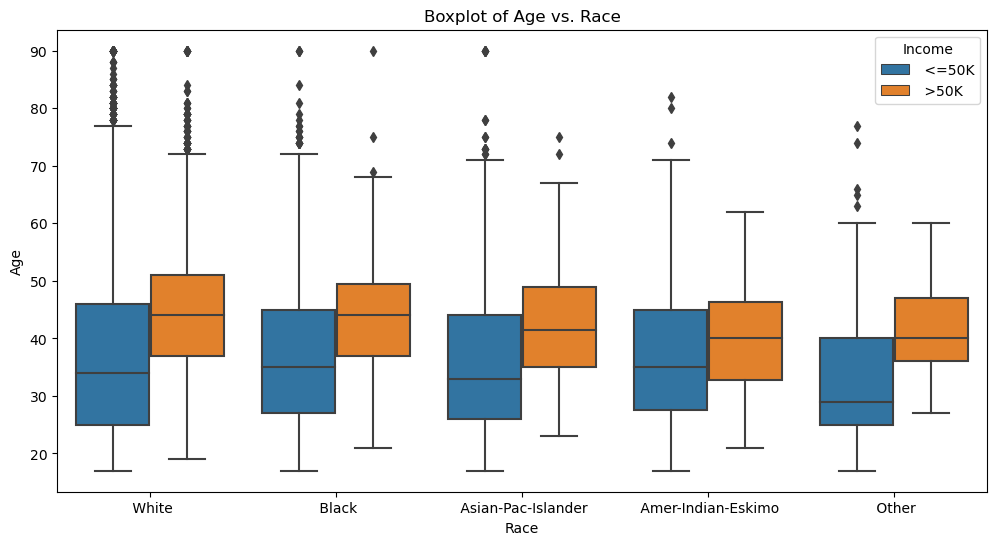

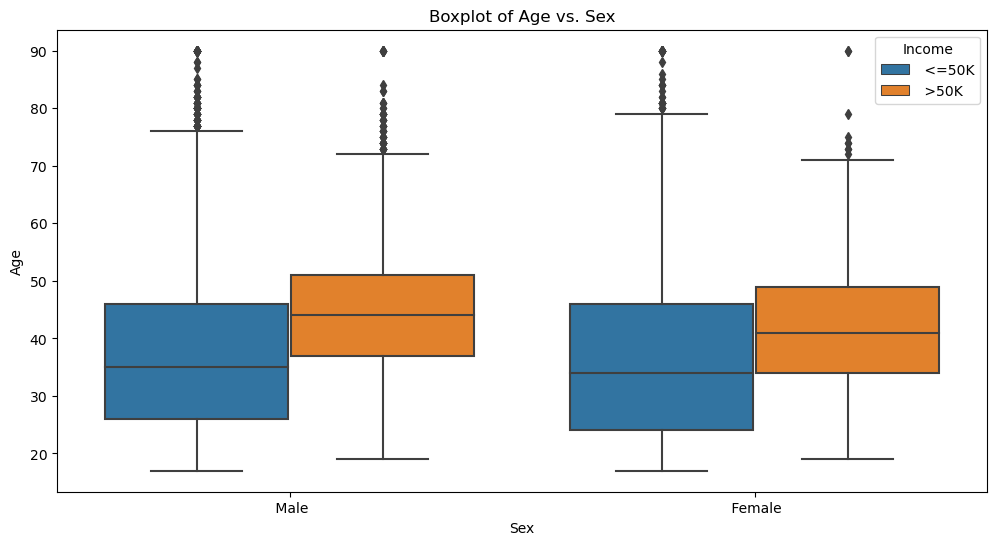

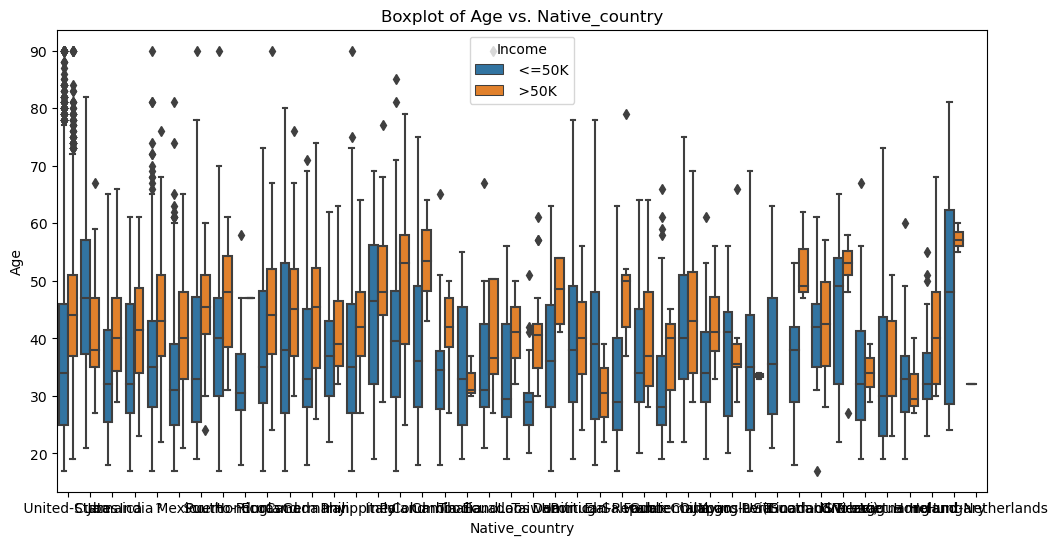

In [14]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex']
for cat_col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y='Age', data=df, hue='Income')
    plt.title(f'Boxplot of Age vs. {cat_col}')
    plt.show()


# Some machine learning models are inherently robust to outliers. For example, tree-based models like Random Forests and Gradient Boosting are less affected by outliers. So we will use Random forest.

In [58]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [59]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [60]:
df['Workclass'] = lb.fit_transform(df['Workclass'])
df['Education'] = lb.fit_transform(df['Education'])
df['Marital_status'] = lb.fit_transform(df['Marital_status'])
df['Occupation'] = lb.fit_transform(df['Occupation'])
df['Relationship'] = lb.fit_transform(df['Relationship'])
df['Race'] = lb.fit_transform(df['Race'])
df['Sex'] = lb.fit_transform(df['Sex'])
df['Native_country'] = lb.fit_transform(df['Native_country'])
df['Income'] = lb.fit_transform(df['Income'])

# 0 Means that Income is low than 50k  and 1 means that Income is higher than   50k 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Co-Relation between all columns to Income column

In [62]:
df.corr()['Income']

Age               0.234039
Workclass         0.051645
Fnlwgt           -0.009481
Education         0.079311
Education_num     0.335182
Marital_status   -0.199295
Occupation        0.075448
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.015845
Income            1.000000
Name: Income, dtype: float64

# Removing the Negetive correlation columns towards the Target column

In [63]:
df = df.drop(columns = ['Fnlwgt','Relationship','Marital_status']) 

# Spliting the training and test data

In [64]:
x = df.iloc[:,:11]
y = df['Income']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Testing the model

In [68]:
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8333845208845209

# The model is prediction  83.33% right results